# Domain Knowledge Features

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(rc={'figure.figsize':(12,12)}, font_scale=1.3)

In [4]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df['Fam_Size'] = df['parch'] + df['sibsp'] #parch: parents/children & sibsp: siblings/spouses
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Fam_Size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [7]:
df['Fam_Size'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Fam_Size, dtype: int64

<AxesSubplot:xlabel='Fam_Size', ylabel='count'>

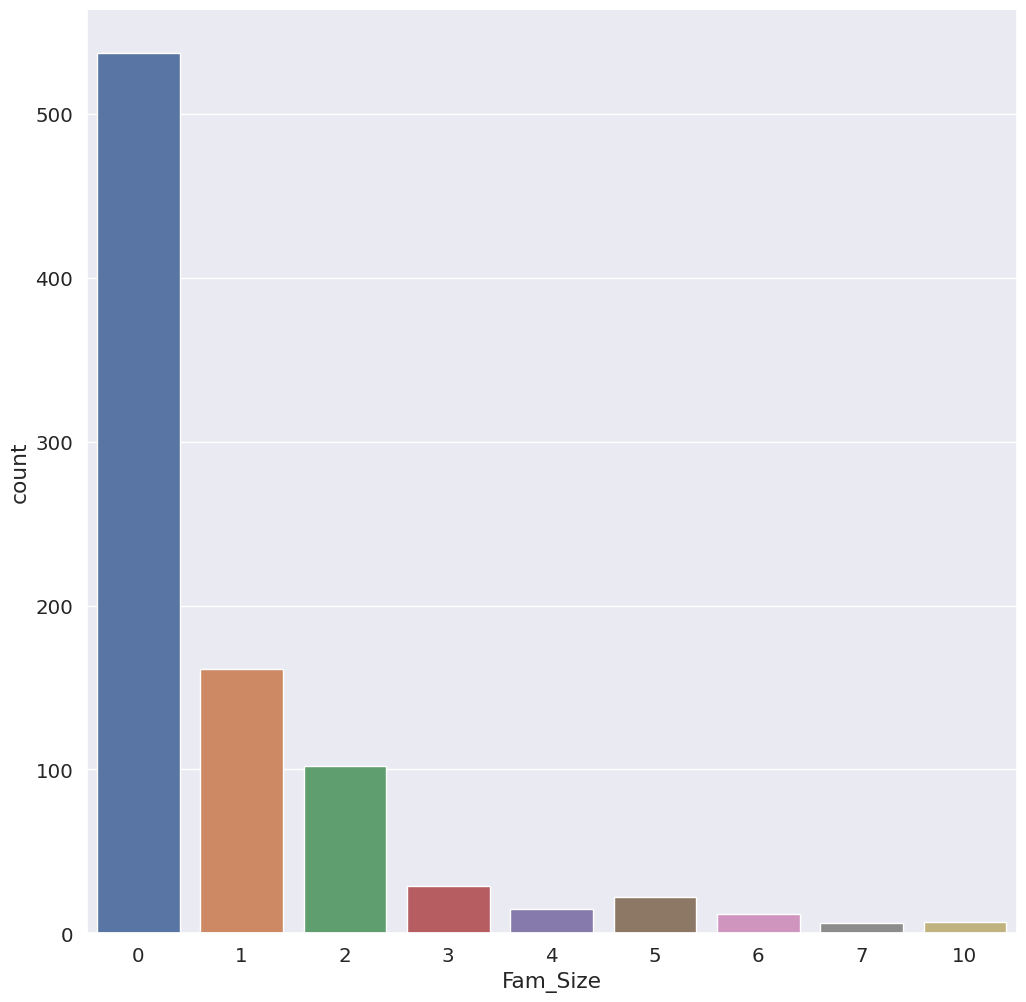

In [8]:
sns.countplot(x='Fam_Size', data=df)

In [11]:
df = pd.read_csv('../dastasets/sendy_logistics.csv')
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [12]:
df['speed'] = df['Distance (KM)'] / (df['Time from Pickup to Arrival']/60)
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,speed
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,0.322148
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,0.481686
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,0.395604
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,0.402685
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,0.444811


<AxesSubplot:xlabel='Platform Type', ylabel='speed'>

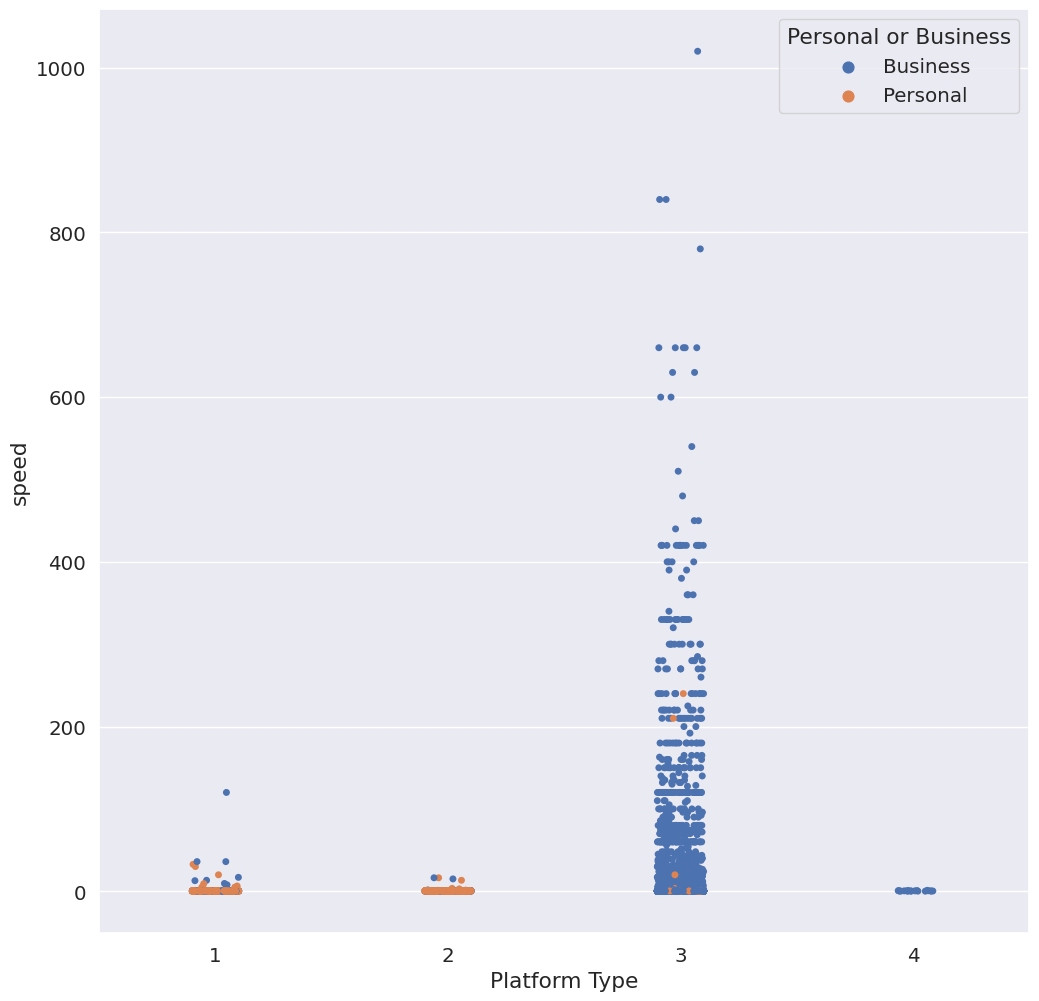

In [14]:
sns.stripplot(x='Platform Type', y='speed', data=df, hue='Personal or Business')

# Date and Time Features

In [17]:
df = pd.read_csv('../dastasets/ufo.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             18216 non-null  object
 1   Colors Reported  2882 non-null   object
 2   Shape Reported   15597 non-null  object
 3   State            18241 non-null  object
 4   Time             18241 non-null  object
dtypes: object(5)
memory usage: 712.7+ KB


In [18]:
df['Time'] = pd.to_datetime(df['Time'], format='%m/%d/%Y %H:%M', errors="coerce")
df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [28]:
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month
df['Month_Name'] = df['Time'].dt.month_name()
df['Week'] = df['Time'].dt.week
df['Day'] = df['Time'].dt.day
df['Week_Day'] = df['Time'].dt.weekday
df['Day_Name'] = df['Time'].dt.day_name()
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df.head()

/tmp/ipykernel_365571/3330922817.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['Time'].dt.week


,City,Colors Reported,Shape Reported,State,Time,Year,Month,Month_Name,Week,Day,Week_Day,Hour,Minute,Day_Name
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930,6,June,22,1,6,22,0,Sunday
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930,6,June,27,30,0,20,0,Monday
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931,2,February,7,15,6,14,0,Sunday
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931,6,June,23,1,0,13,0,Monday
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933,4,April,16,18,1,19,0,Tuesday


<AxesSubplot:xlabel='Month_Name', ylabel='count'>

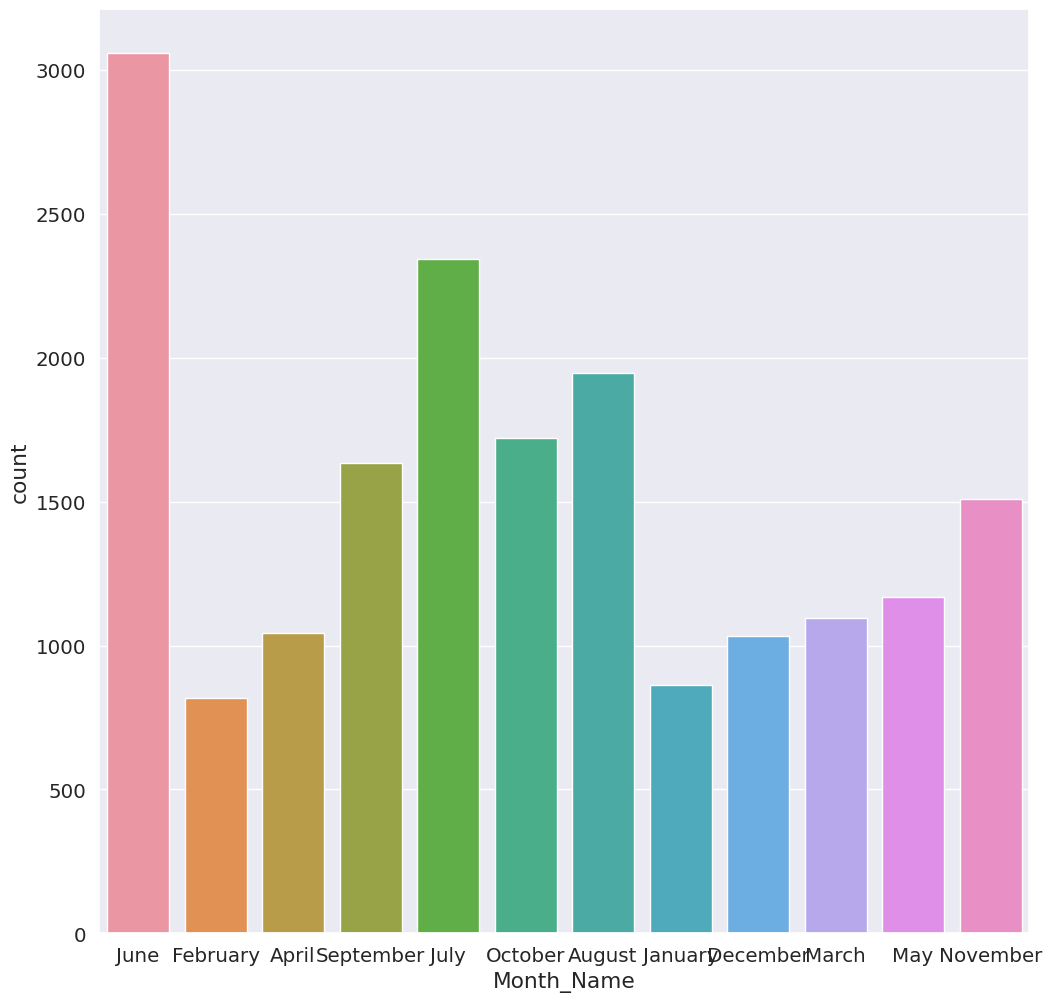

In [21]:
sns.countplot(x='Month_Name', data=df)

<AxesSubplot:xlabel='Day_Name', ylabel='count'>

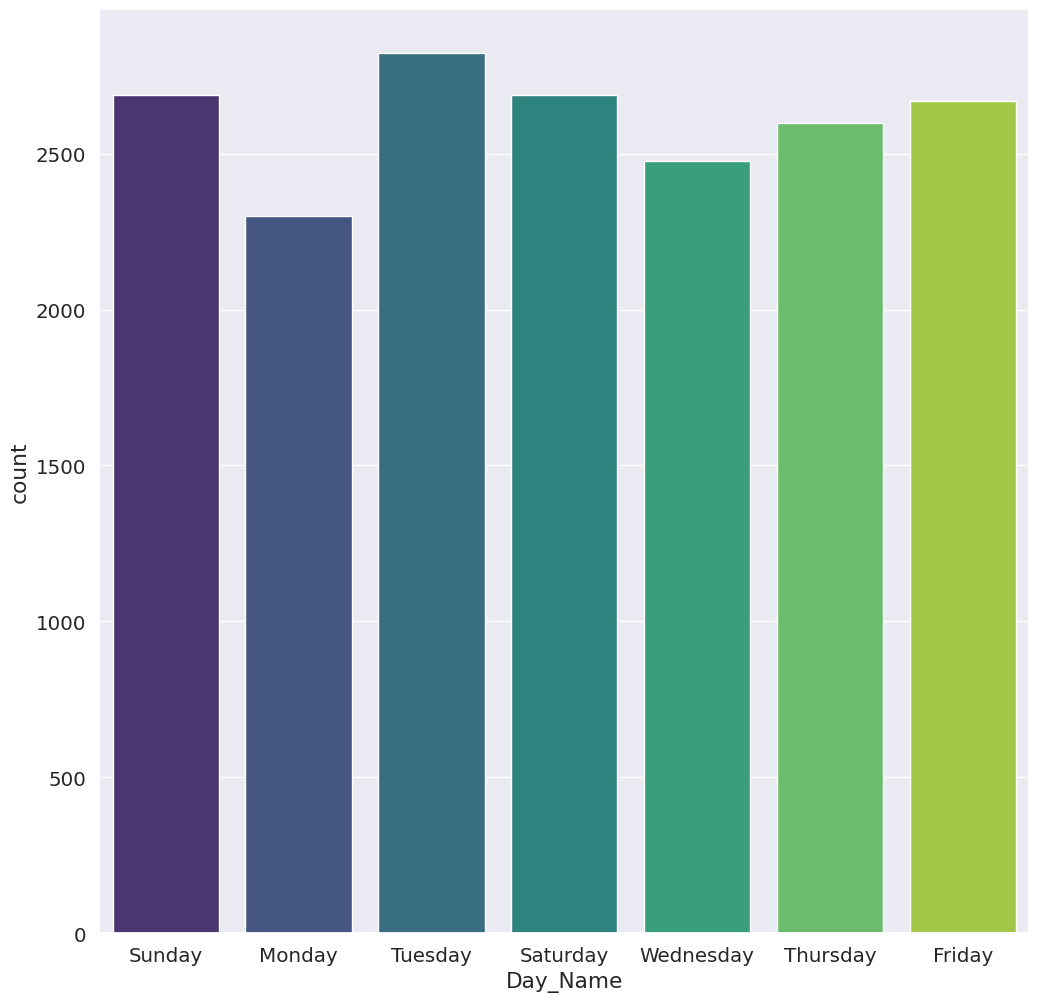

In [29]:
sns.countplot(x='Day_Name', data=df, palette='viridis')

<AxesSubplot:xlabel='count', ylabel='Month_Name'>

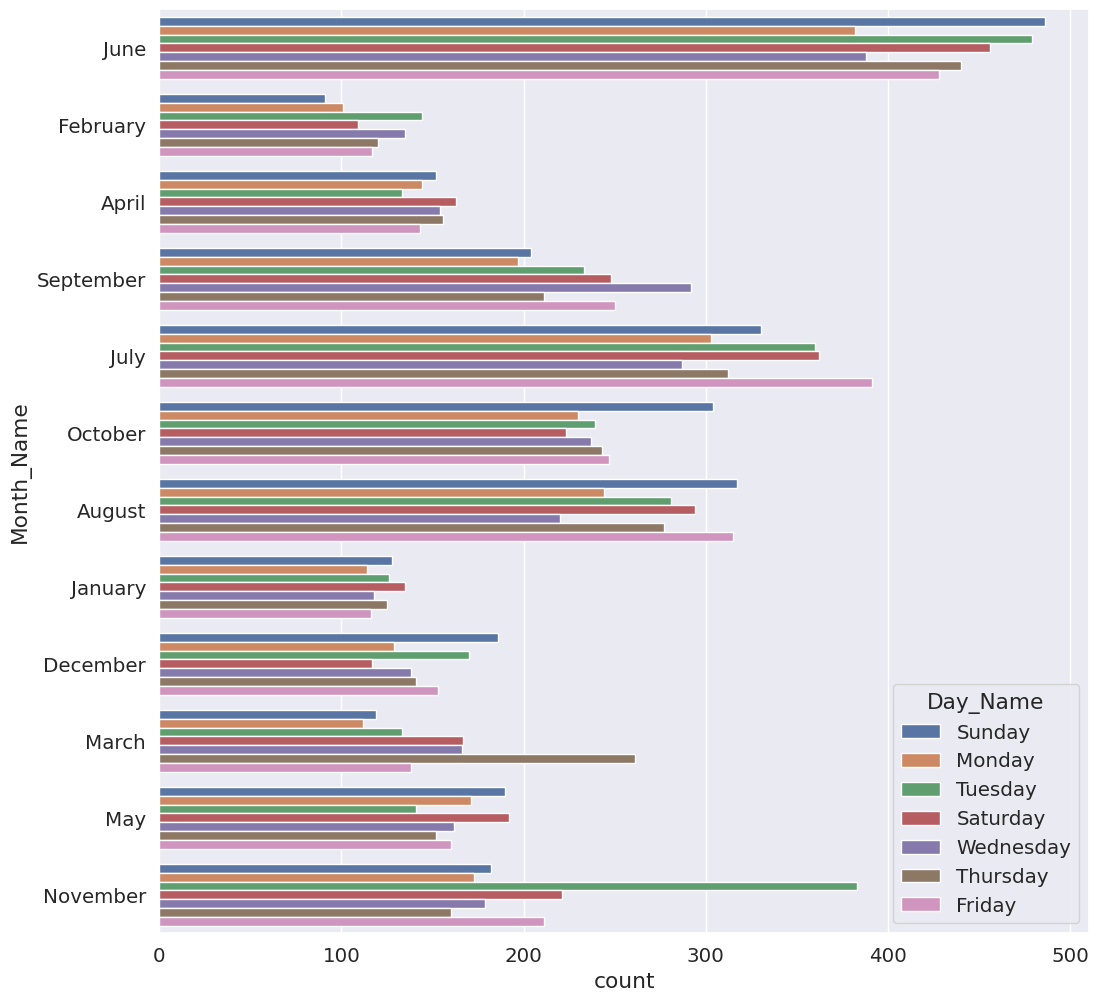

In [30]:
sns.countplot(y='Month_Name', data=df, hue='Day_Name')

In [31]:
def map_hours(x):
    if x in [0,1,2,3,4,5,6,7,8,9,10,11,12]:
        return 'morning'
    elif x in [13,14,15,16]:
        return 'afternoon'
    else:
        return 'evening'
df['Period'] = df['Hour'].apply(map_hours)

<AxesSubplot:xlabel='Period', ylabel='count'>

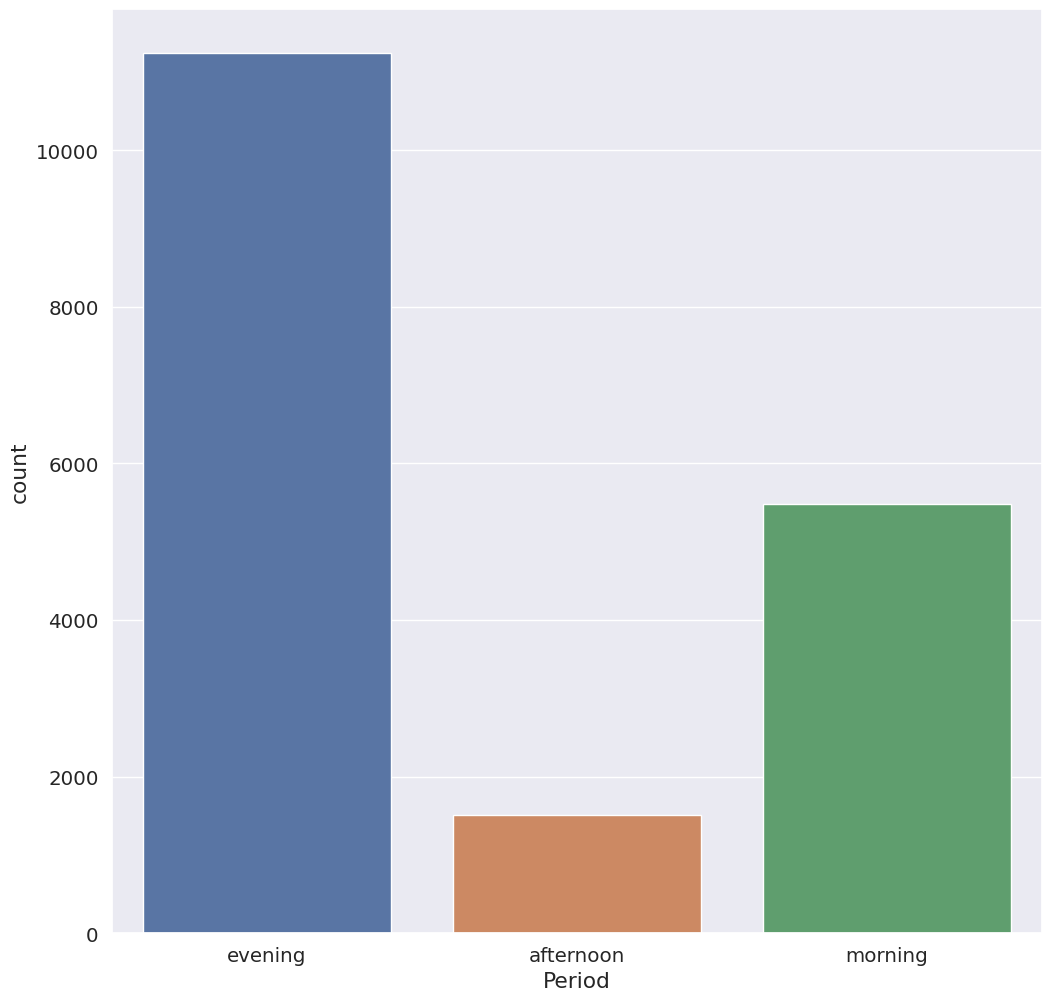

In [32]:
sns.countplot(x='Period', data=df)

In [33]:
def map_months(x):
    if x in [12,1,2]:
        return 'Winter'
    elif x in [3,4,5]:
        return 'Spring'
    elif x in [6,7,8]:
        return 'Summer'
    elif x in [9,10,11]:
        return 'Autumn'
df['Season'] = df['Month'].apply(map_months)

<AxesSubplot:xlabel='Season', ylabel='count'>

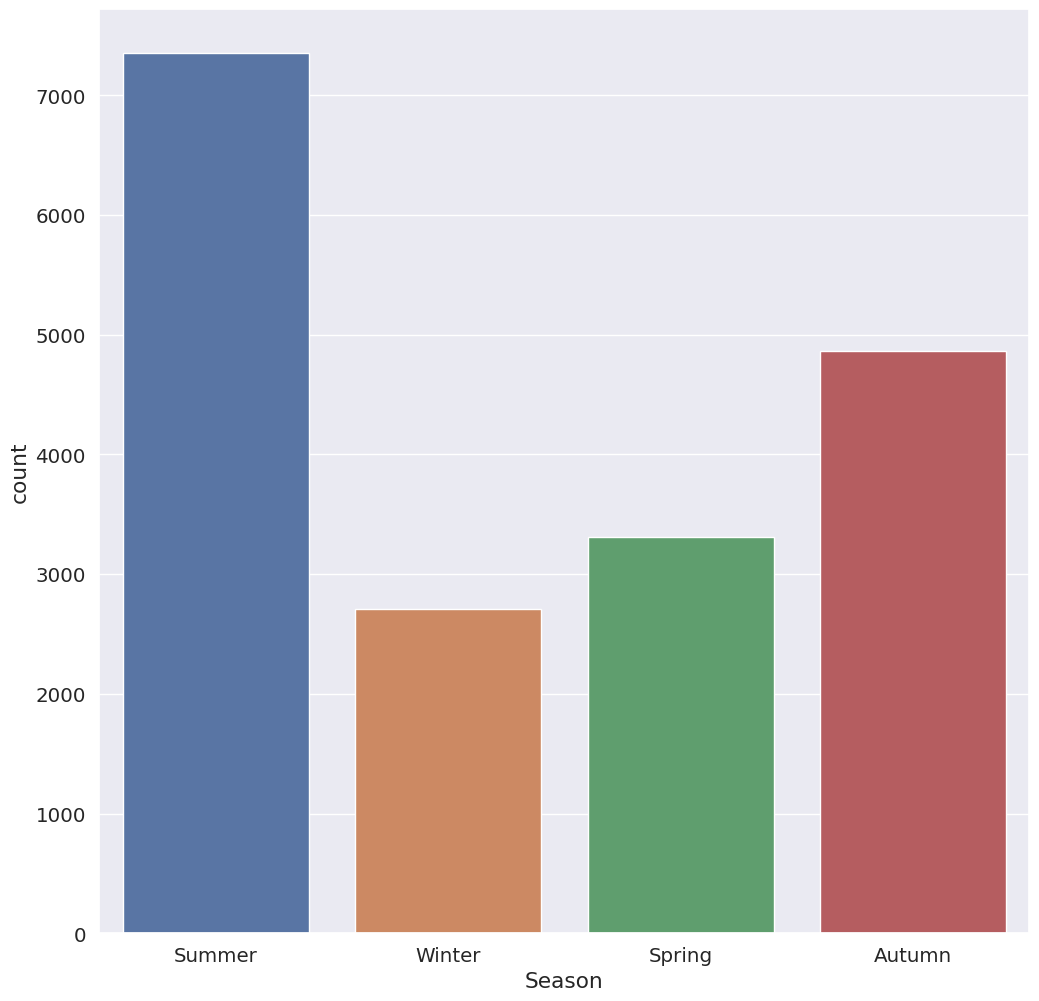

In [34]:
sns.countplot(x='Season', data=df)

In [37]:
from datetime import datetime
df['Elapsed_Years'] = (datetime.now() - df['Time'])/np.timedelta64(1, 'Y')
df.head()

,City,Colors Reported,Shape Reported,State,Time,Year,Month,Month_Name,Week,Day,Week_Day,Hour,Minute,Day_Name,Period,Season,Elapsed_Years
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930,6,June,22,1,6,22,0,Sunday,evening,Summer,92.431366
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930,6,June,27,30,0,20,0,Monday,evening,Summer,92.352195
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931,2,February,7,15,6,14,0,Sunday,afternoon,Winter,91.723161
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931,6,June,23,1,0,13,0,Monday,afternoon,Summer,91.433057
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933,4,April,16,18,1,19,0,Tuesday,evening,Spring,89.551430


# String operations

In [40]:
df = pd.read_csv('../dastasets/Ecommerce Purchases.csv')

In [41]:
df.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [42]:
#Get Credeit card Type:
def extract_cct(cc):
    cc = str(cc)
    if cc.startswith('3'):
        return 'Travel/Entertainment cards'
    elif cc.startswith('4'):
        return 'Visa'
    elif cc.startswith('5'):
        return 'Master Card'
    elif cc.startswith('6'):
        return 'Discover Card'
df['CC Type'] = df['Credit Card'].apply(extract_cct)
df.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,CC Type
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,Discover Card
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,Travel/Entertainment cards
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95,Discover Card
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04,Discover Card
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82,Discover Card


<AxesSubplot:xlabel='CC Type', ylabel='count'>

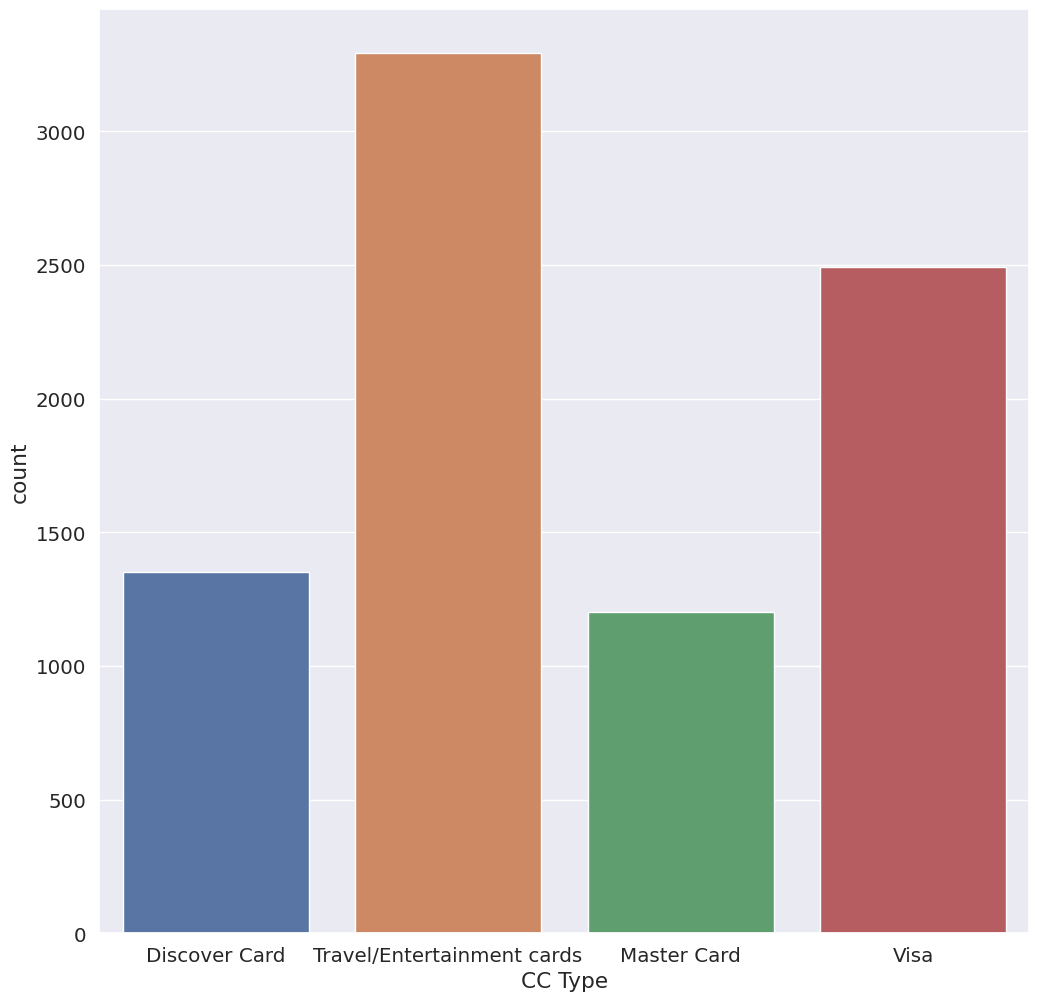

In [43]:
sns.countplot(x='CC Type', data=df)

In [44]:
# Get Email Provider
def extract_email_provider(email):
    return email.split('@')[1]

df['Email Provider'] = df['Email'].apply(extract_email_provider)

In [45]:
df['Email Provider'].value_counts()

hotmail.com            1638
yahoo.com              1616
gmail.com              1605
smith.com                42
williams.com             37
                       ... 
booker.com                1
woods-allen.biz           1
richards-wilson.com       1
morris-thomas.com         1
wade-garner.com           1
Name: Email Provider, Length: 3416, dtype: int64

In [46]:
df['Email Provider'].value_counts()[:5]

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email Provider, dtype: int64

# Web Data

In [51]:
df  = pd.read_csv('../dastasets/Ecommerce Purchases.csv')
df.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [52]:
df = df.loc[:100]

In [56]:
#https://github.com/selwin/python-user-agents
import user_agents

ua = 'Mozilla/5.0 (iPhone; CPU iPhone OS 5_1 like Mac OS X) AppleWebKit/534.46 (KHTML, like Gecko) Version/5.1 Mobile/9B179 Safari/7534.48.3'
ua = user_agents.parse(ua)

print('Is a bot? ', ua.is_bot)
print('Is mobile? ', ua.is_mobile)
print('Is PC? ', ua.is_pc)
print('OS Family: ', ua.os.family)
print('OS Version: ', ua.os.version)
print('Browser Family: ', ua.browser.family)
print('Browser Version: ', ua.browser.version)
print('Device Family: ',ua.device.family)
print('Device Brand: ',ua.device.brand)
print('Device Model: ',ua.device.model)

Is a bot?  False
Is mobile?  True
Is PC?  False
OS Family:  iOS
OS Version:  (5, 1)
Browser Family:  Mobile Safari
Browser Version:  (5, 1)
Device Family:  iPhone
Device Brand:  Apple
Device Model:  iPhone


In [57]:
def extract_web_data(ua):
    ua = user_agents.parse(ua)
    return pd.Series((ua.os.family, ua.browser.family, ua.device.family))

df[['OS','Browser','Device']] = df['Browser Info'].apply(extract_web_data)
df.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,OS,Browser,Device
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,Linux,Opera,Other
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,Windows,Opera,Other
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95,Windows,IE,Other
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04,Mac OS X,Safari,Mac
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82,Linux,Opera,Other


<AxesSubplot:xlabel='OS', ylabel='count'>

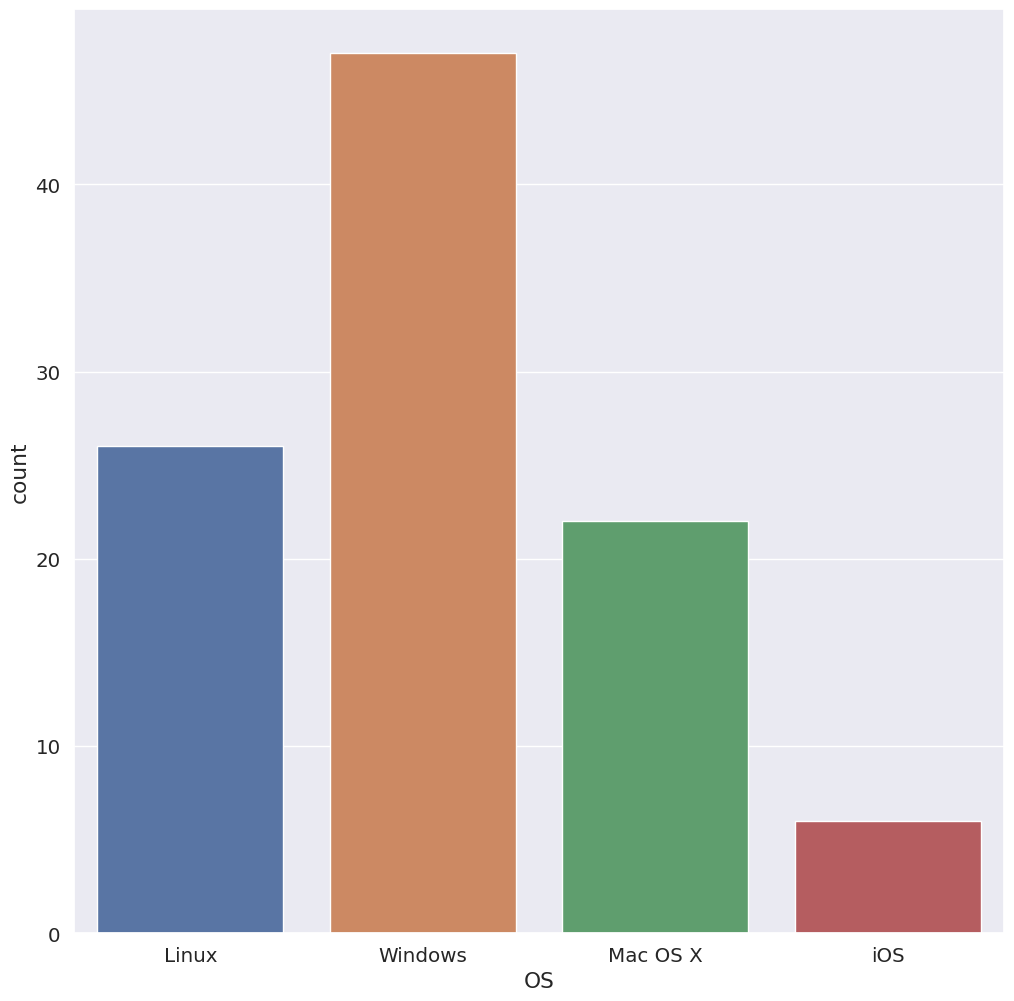

In [58]:
sns.countplot(x='OS', data=df)

<AxesSubplot:xlabel='Browser', ylabel='count'>

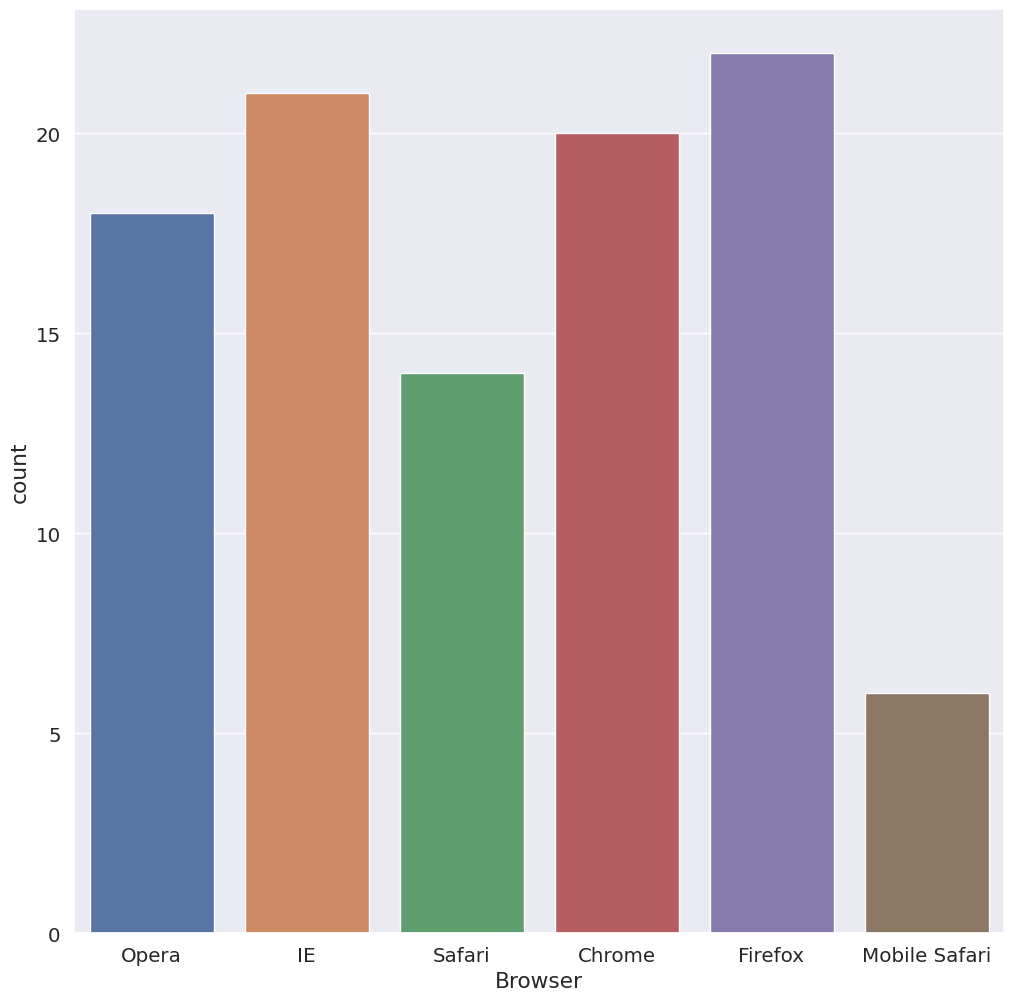

In [59]:
sns.countplot(x='Browser', data=df)

In [60]:
#Get location from IP address
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo

response = ip2geo.get('45.243.72.231', api_key='free')
print('ip address:',response.ip_address)
print('city:',response.city)
print('region:',response.region)
print('country:',response.country)
print('latitude:',response.latitude)
print('longitude:',response.longitude)

ip address: 45.243.72.231
city: Cairo
region: Cairo
country: EG
latitude: 30.0443879
longitude: 31.2357257


In [66]:
def extract_country_from_ip(ip):
    try:
        response = ip2geo.get(ip, api_key='free')
        return response.country
    except:
        return 'Missing'
    
    
df['Country'] = df['IP Address'].apply(extract_country_from_ip)

df.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,OS,Browser,Device,Country
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,Linux,Opera,Other,NL
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,Windows,Opera,Other,IT
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95,Windows,IE,Other,CA
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04,Mac OS X,Safari,Mac,US
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82,Linux,Opera,Other,US


In [67]:
df['Country'].value_counts()

US    33
ZZ    12
JP     6
CN     6
DE     5
BR     4
GB     4
CA     3
IT     3
MA     2
ES     2
MX     2
KR     1
LT     1
UA     1
TH     1
SE     1
TW     1
PT     1
IR     1
NL     1
BE     1
MU     1
LS     1
FI     1
CY     1
ZA     1
HK     1
IQ     1
NO     1
RO     1
Name: Country, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Country'>

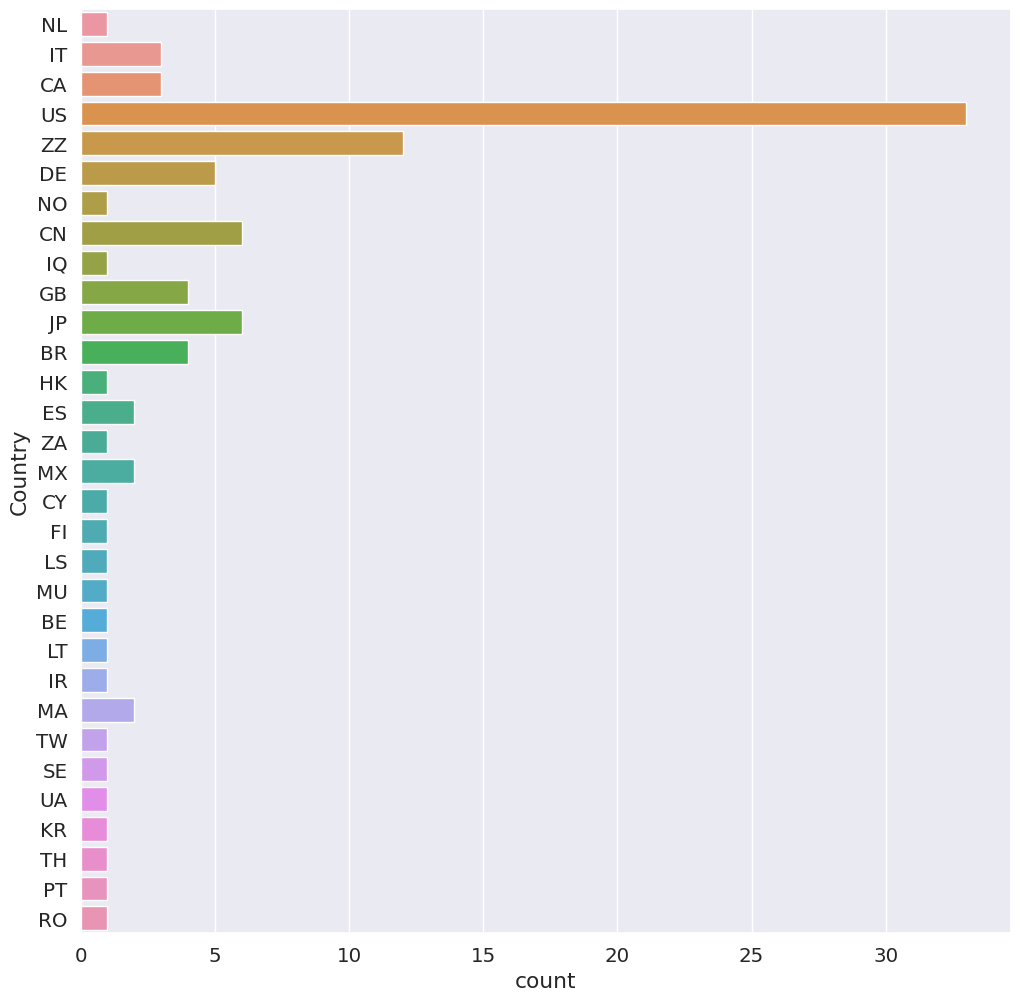

In [68]:
sns.countplot(y='Country', data=df)

In [69]:
# Geospatial Features
from datasist.feature_engineering import haversine_distance

my_home = [51.9767, 7.4197]
cafe = [30.120982, 31.322026]

In [70]:
#Measuring Distance
haversine_distance(my_home[0], my_home[1], cafe[0], cafe[1])

0    3120.479992
dtype: float64

In [71]:
#Get Center Location between 2 points
from datasist.feature_engineering import get_location_center

get_location_center(my_home[0], cafe[0]), get_location_center(my_home[1], cafe[1])

(0    41.048841
 dtype: float64,
 0    19.370863
 dtype: float64)

In [72]:
df = pd.read_csv('../dastasets/sendy_logistics.csv')

In [73]:
#distance between Pickup and Destination
df['Dist_Pick_Dest'] = haversine_distance(df['Pickup Lat'], df['Pickup Long'], df['Destination Lat'], df['Destination Long'])
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Dist_Pick_Dest
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1.930333
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,11.339849
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1.880079
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,4.943458
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,3.724829


In [74]:
df['Center_Lat'] = get_location_center(df['Pickup Lat'], df['Destination Lat'])
df['Center_Long'] = get_location_center(df['Pickup Long'], df['Destination Long'])
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Dist_Pick_Dest,Center_Lat,Center_Long
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1.930333,-1.309080,36.830056
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,11.339849,-1.323229,36.856837
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1.880079,-1.304603,36.835807
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,4.943458,-1.269224,36.813730
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,3.724829,-1.280819,36.800968


In [76]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Singularity")
location = geolocator.reverse("51.9767, 7.4197")
print(location.address)

15, Gartenstraße, Havixbeck, Kreis Coesfeld, Nordrhein-Westfalen, 48329, Deutschland


In [77]:
import zipcodes
zipcodes.matching('48329')

[{'zip_code': '48329',
  'zip_code_type': 'STANDARD',
  'active': True,
  'city': 'Waterford',
  'acceptable_cities': ['Waterford Township', 'Waterford Twp'],
  'unacceptable_cities': [],
  'state': 'MI',
  'county': 'Oakland County',
  'timezone': 'America/Detroit',
  'area_codes': ['248'],
  'world_region': 'NA',
  'country': 'US',
  'lat': '42.6890',
  'long': '-83.3891'}]

In [78]:
df = pd.read_csv('../dastasets/zip_codes.csv')
df

,ZIP,2010 Census Population,FIPS Code,StCtyCode,County Name,Zip Code Designation
0,99546,* 525,2016,2016,ALEUTIANS WEST,Low Income Area/HPSA
1,99551,* 104,2050,2050,BETHEL,Low Income Area/HPSA
2,99553,"* 1,027",2013,2013,ALEUTIANS EAST,Low Income Area/HPSA
3,99554,"* 1,439",2270,2270,WADE HAMPTON,Low Income Area/HPSA
4,99555,* 219,2070,2070,DILLINGHAM,Low Income Area/HPSA
...,...,...,...,...,...,...
995,72081,"* 7,926",5145,4720,WHITE,Low Income Area
996,71749,"* 2,651",5139,4690,UNION,Low Income Area/HPSA
997,72351,* 898,5093,4460,MISSISSIPPI,Low Income Area
998,72082,"* 1,917",5145,4720,WHITE,Low Income Area


In [79]:
def get_city_from_zip_code(zip_code):
    try:
        return zipcodes.matching(str(zip_code))[0]['city']
    except:
        return np.nan

df['City'] = df['ZIP'].apply(get_city_from_zip_code)
df.head()

,ZIP,2010 Census Population,FIPS Code,StCtyCode,County Name,Zip Code Designation,City
0,99546,* 525,2016,2016,ALEUTIANS WEST,Low Income Area/HPSA,Adak
1,99551,* 104,2050,2050,BETHEL,Low Income Area/HPSA,Akiachak
2,99553,"* 1,027",2013,2013,ALEUTIANS EAST,Low Income Area/HPSA,Akutan
3,99554,"* 1,439",2270,2270,WADE HAMPTON,Low Income Area/HPSA,Alakanuk
4,99555,* 219,2070,2070,DILLINGHAM,Low Income Area/HPSA,Aleknagik


In [80]:
len(df['City'].unique())

843

In [81]:
df['City'].value_counts()

Birmingham    21
Mobile        18
Montgomery    14
Huntsville    10
Tuscaloosa     5
              ..
Eva            1
Fackler        1
Fairfield      1
Fairhope       1
Keo            1
Name: City, Length: 843, dtype: int64

# Text Features (Bag-of-Words Model)

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
text = ["The quick brown fox jumped over the lazy dog but it is brown so it is awesome it jumped as many as it want."]

In [85]:
vectorizer.fit(text)
vectorizer.vocabulary_

{'quick': 6,
 'brown': 1,
 'fox': 3,
 'jumped': 4,
 'lazy': 5,
 'dog': 2,
 'awesome': 0,
 'want': 7}

In [88]:
vectorizer.get_feature_names()

['awesome', 'brown', 'dog', 'fox', 'jumped', 'lazy', 'quick', 'want']

In [89]:
vector = vectorizer.transform(text)
vector.toarray()

array([[1, 2, 1, 1, 2, 1, 1, 1]])

In [90]:
text2 = ["lazy fox is jumped awesome"]
text3 = ["brown dog is quick so it is awesome"]

In [91]:
vector = vectorizer.transform(text2)
vector.toarray()

array([[1, 0, 0, 1, 1, 1, 0, 0]])

In [92]:
vector2 = vectorizer.transform(text3)
vector.toarray()

array([[1, 0, 0, 1, 1, 1, 0, 0]])

In [93]:
pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names())

/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,awesome,brown,dog,fox,jumped,lazy,quick,want
0,1,0,0,1,1,1,0,0


In [94]:
spam_df = pd.read_csv('../dastasets/spam_dataset.csv', sep='\t')
spam_df

,Label,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [95]:
emails = spam_df['Email']
emails

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Email, Length: 5572, dtype: object

In [97]:
vectorizer = CountVectorizer(stop_words='english')
emails_vector = vectorizer.fit_transform(emails)
emails_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [98]:
vectorizer.get_feature_names()

/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084

In [100]:
df = pd.DataFrame(emails_vector.toarray(), columns=vectorizer.get_feature_names())
df

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Word Frequencies with TfidfVectorizer

In [101]:
# Term Frequency – Inverse Document” Frequency (TFidf)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

text = ["The quick brown fox jumped over the lazy dog but it is brown so it is awesome it jumped as many as it want."]

In [102]:
vectorizer.fit(text)

vectorizer.vocabulary_

{'quick': 6,
 'brown': 1,
 'fox': 3,
 'jumped': 4,
 'lazy': 5,
 'dog': 2,
 'awesome': 0,
 'want': 7}

In [103]:
vectorizer.get_feature_names()

/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['awesome', 'brown', 'dog', 'fox', 'jumped', 'lazy', 'quick', 'want']

In [104]:
vector = vectorizer.transform(text)

vector.toarray()

array([[0.26726124, 0.53452248, 0.26726124, 0.26726124, 0.53452248,
        0.26726124, 0.26726124, 0.26726124]])

In [105]:
pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names())

,awesome,brown,dog,fox,jumped,lazy,quick,want
0,0.267261,0.534522,0.267261,0.267261,0.534522,0.267261,0.267261,0.267261


In [106]:
df = pd.read_csv("../dastasets/spam_dataset.csv", sep='\t')
df.head()

,Label,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [107]:
X = df['Email']
vectorizer = TfidfVectorizer(stop_words='english')

In [108]:
vectorizer.fit(X)

vectorizer.vocabulary_

{'jurong': 4248,
 'point': 5779,
 'crazy': 2282,
 'available': 1284,
 'bugis': 1719,
 'great': 3555,
 'world': 8285,
 'la': 4374,
 'buffet': 1717,
 'cine': 2007,
 'got': 3515,
 'amore': 1064,
 'wat': 8083,
 'ok': 5377,
 'lar': 4410,
 'joking': 4216,
 'wif': 8191,
 'oni': 5403,
 'free': 3280,
 'entry': 2889,
 'wkly': 8243,
 'comp': 2123,
 'win': 8203,
 'fa': 3018,
 'cup': 2341,
 'final': 3135,
 'tkts': 7569,
 '21st': 412,
 '2005': 403,
 'text': 7437,
 '87121': 794,
 'receive': 6158,
 'question': 6052,
 'std': 7077,
 'txt': 7754,
 'rate': 6104,
 'apply': 1141,
 '08452810075over18': 77,
 'dun': 2751,
 'say': 6496,
 'early': 2770,
 'hor': 3840,
 'nah': 5124,
 'don': 2663,
 'think': 7492,
 'goes': 3479,
 'usf': 7892,
 'lives': 4562,
 'freemsg': 3287,
 'hey': 3757,
 'darling': 2398,
 'week': 8129,
 'word': 8276,
 'like': 4512,
 'fun': 3342,
 'tb': 7372,
 'xxx': 8350,
 'chgs': 1961,
 'send': 6584,
 '50': 616,
 'rcv': 6116,
 'brother': 1689,
 'speak': 6959,
 'treat': 7687,
 'aids': 997,
 'pate

In [109]:
vector = vectorizer.transform(X)

vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [110]:
tfidf_df = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names())
tfidf_df

/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
df.iloc[0]['Email']

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [112]:
tfidf_df.iloc[0]['world']

0.23740715800944148